In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,166 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155501 files and d

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
import matplotlib.pyplot as plt 
rc('font',family='NanumBarunGothic') # 한글
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호

import os
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.display import HTML
import time
import re

In [ ]:
pip install gtts

  Using cached gTTS-2.2.4-py3-none-any.whl (26 kB)


In [ ]:
from gtts import gTTS
import os 
from IPython.display import Audio

def speak(text):
    tts = gTTS(text=text, lang='ko') 
    filename='voice.mp3' 
    tts.save(filename)
    display(Audio(filename, autoplay=True))
    os.remove(filename)

In [ ]:
%cd /content/drive/MyDrive/Cakd3_Project/1.ldata_현정

/content/drive/MyDrive/Cakd3_Project/1.ldata_현정


### 데이터셋 불러오기

In [ ]:
dataset1 = pd.read_csv('./small_dataset1.csv', index_col=0)
dataset2 = pd.read_csv('./small_dataset2.csv', index_col=0)

In [ ]:
# 변수 중요도 확인

from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def importance(dataset1, dataset2):
  X_train, X_test, y_train, y_test = train_test_split(dataset1.drop('y',axis=1),
                                                      dataset1.y,
                                                      test_size=0.2,
                                                      random_state=1004)

  xgb_clf = XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=300)
  xgb_clf.fit(X_train, y_train)
  fig, ax = plt.subplots(1,1,figsize=(10,8))
  plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

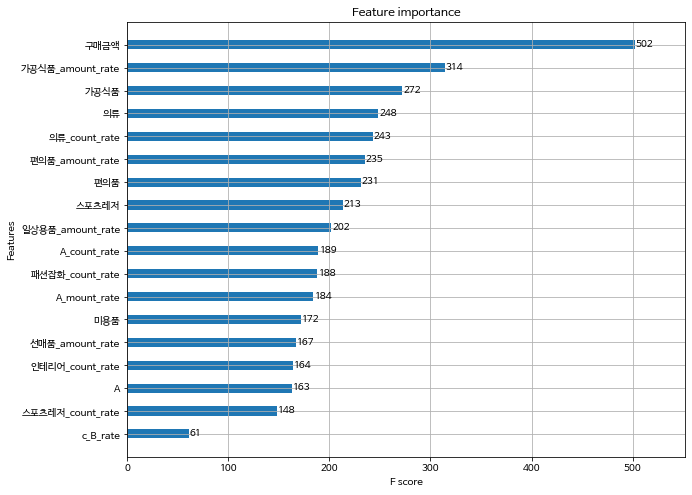

In [ ]:
importance(dataset1, dataset2)

In [ ]:
cols = ['y','구매금액','가공식품_amount_rate','의류','편의품','미용품',
                '패션잡화_count_rate','일상용품_amount_rate','스포츠레저','A_count_rate','편의품_amount_rate']

In [ ]:
# 중요한 변수 9개만 사용

n=9
dataset2 = dataset2[cols[:n+1]]

# 군집

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
        
       # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def clustering(dataset, scaler=True):

  target_data = dataset.query('y==1').drop('y',axis=1)

  # 최소최대 정규화
  if scaler:
    mm = MinMaxScaler()
    data_scaled = mm.fit_transform(target_data)
    data_scaled = pd.DataFrame(data_scaled, columns=target_data.columns)
  else:
    data_scaled = target_data

  # elbow method
  sse = {}
  for k in range(1, 10):
      kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
      data_scaled["clusters"] = kmeans.labels_
      sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()

  # 군집화
  # display(speak('군집개수 입력!'))
  # k = int(input('군집개수 입력:'))
  k=2

  data_scaled.drop('clusters', axis=1, inplace=True)
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, random_state=0).fit(data_scaled)
  data_scaled['cluster'] = kmeans.labels_

  # 모든 개별 데이터의 실루엣 계수값 
  score_samples = silhouette_samples(data_scaled.drop('cluster',axis=1), data_scaled['cluster'])

  # 실루엣 계수 컬럼 추가
  data_scaled['silhouette_coeff'] = score_samples

  # 모든 데이터의 평균 실루엣 계수값 
  average_score = silhouette_score(data_scaled.drop('cluster',axis=1), data_scaled['cluster'])
  print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

  display(data_scaled.groupby('cluster')['silhouette_coeff'].mean())

  # cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
  visualize_silhouette([2, 3, 4, 5], data_scaled[data_scaled.columns[:-2]])
  visualize_kmeans_plot_multi([2, 3, 4, 5],data_scaled[data_scaled.columns[:-2]])

  return data_scaled

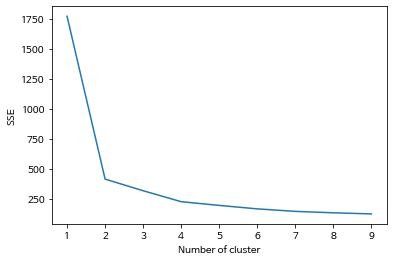

Silhouette Analysis Score:0.629


cluster
0    0.708689
1    0.601770
Name: silhouette_coeff, dtype: float64

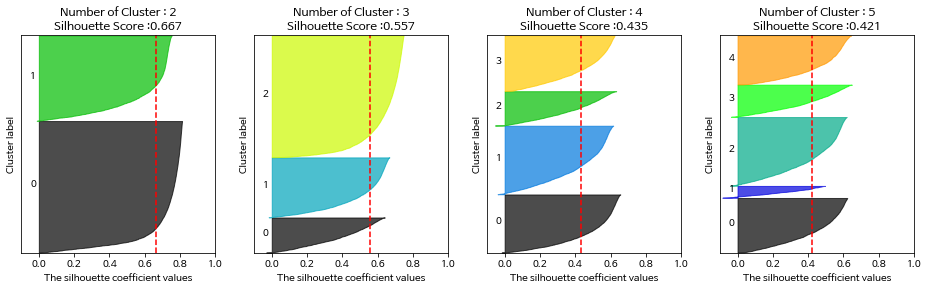

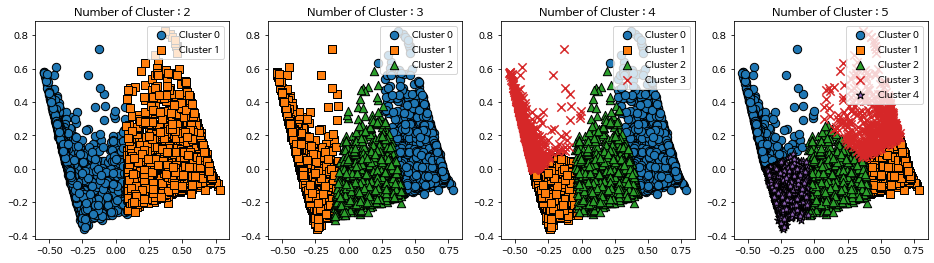

,구매금액,가공식품_amount_rate,의류,편의품,미용품,패션잡화_count_rate,일상용품_amount_rate,스포츠레저,A_count_rate,cluster,silhouette_coeff
고객번호,,,,,,,,,,,
1,0.000739,0.0779,0.000531,0.000746,0.000430,0.059640,0.090104,0.004194,0.7740,1,0.713472
3,0.000801,0.5788,0.000532,0.000877,0.000000,0.000000,0.111327,0.002097,0.0000,0,0.720758
4,0.001214,0.2316,0.000571,0.001916,0.000294,0.040744,0.048872,0.000251,0.6713,1,0.596608
7,0.001421,0.0430,0.000554,0.002063,0.006842,0.044877,0.008125,0.001283,0.6608,1,0.624757
8,0.001130,0.3200,0.000551,0.001325,0.000488,0.013581,0.005821,0.001001,0.9796,1,0.648910
...,...,...,...,...,...,...,...,...,...,...,...
19355,0.001107,0.2680,0.000000,0.001512,0.000650,0.004576,0.019646,0.000000,0.0307,0,0.761816
19357,0.001313,0.5252,0.000181,0.001654,0.000825,0.011810,0.035169,0.000391,0.0444,0,0.742818
19359,0.000919,0.6151,0.000532,0.000979,0.003597,0.001624,0.096895,0.004194,0.0000,0,0.697334


In [ ]:
clustering(dataset2, scaler=False)

In [ ]:
# 4개로 군집

cls_dataset = dataset2.query('y==1').drop('y',axis=1).copy()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, random_state=0).fit(cls_dataset)
cls_dataset['cluster'] = kmeans.labels_

display(cls_dataset)

# cls_dataset[['y','cluster']].to_csv('./clustering_result.csv')

,구매금액,가공식품_amount_rate,의류,편의품,미용품,패션잡화_count_rate,일상용품_amount_rate,스포츠레저,A_count_rate,cluster
고객번호,,,,,,,,,,
1,0.000739,0.0779,0.000531,0.000746,0.000430,0.059640,0.090104,0.004194,0.7740,0
3,0.000801,0.5788,0.000532,0.000877,0.000000,0.000000,0.111327,0.002097,0.0000,3
4,0.001214,0.2316,0.000571,0.001916,0.000294,0.040744,0.048872,0.000251,0.6713,2
7,0.001421,0.0430,0.000554,0.002063,0.006842,0.044877,0.008125,0.001283,0.6608,2
8,0.001130,0.3200,0.000551,0.001325,0.000488,0.013581,0.005821,0.001001,0.9796,0
...,...,...,...,...,...,...,...,...,...,...
19355,0.001107,0.2680,0.000000,0.001512,0.000650,0.004576,0.019646,0.000000,0.0307,1
19357,0.001313,0.5252,0.000181,0.001654,0.000825,0.011810,0.035169,0.000391,0.0444,3
19359,0.000919,0.6151,0.000532,0.000979,0.003597,0.001624,0.096895,0.004194,0.0000,3


# 나무그림

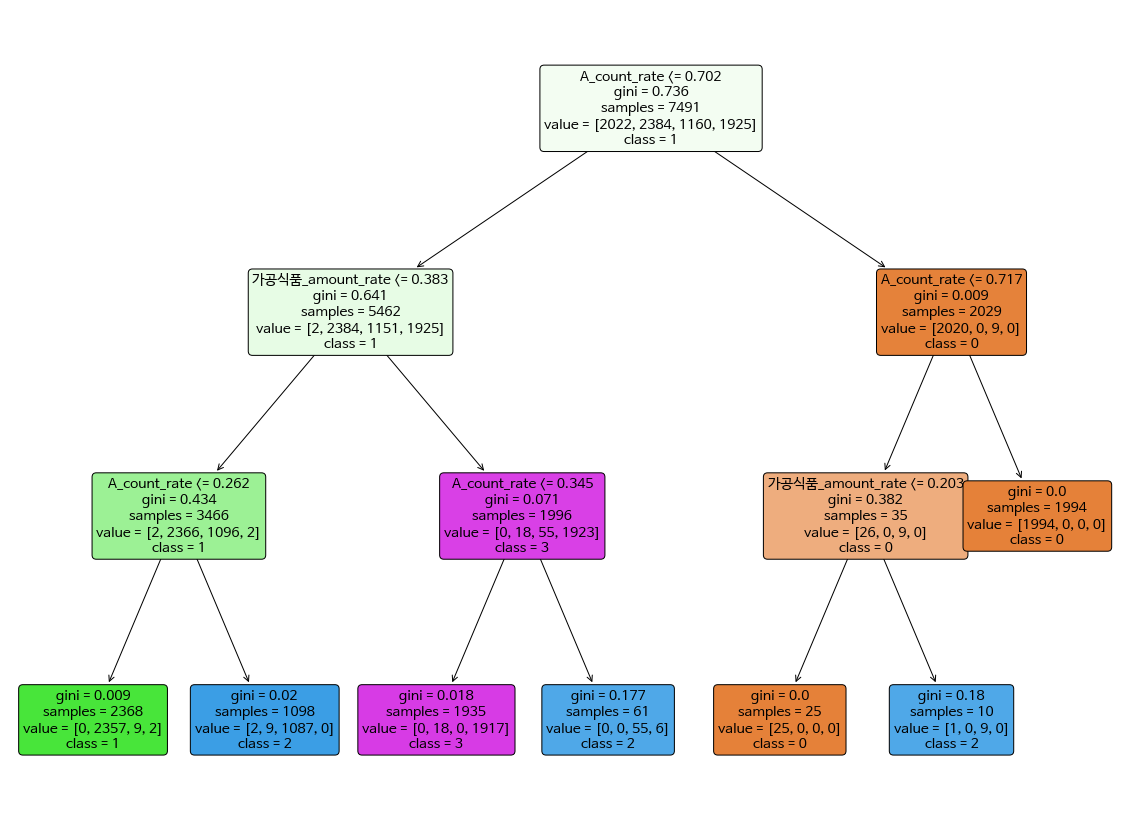

In [ ]:
# 구매 감소 고객 끼리 분류
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cls_dataset.drop('cluster',axis=1),cls_dataset.cluster,
                                                    test_size = 0.2,
                                                    random_state=1004)

dct_clf = DecisionTreeClassifier(max_depth=3)
dct_clf.fit(X_train,y_train)


plt.figure(figsize=(20,15))
plot_tree(dct_clf, filled=True,
              feature_names=X_train.columns,
              class_names=['0','1','2','3'],
              rounded=True, fontsize=14)# rounded : 박스 모서리 처리
plt.show()

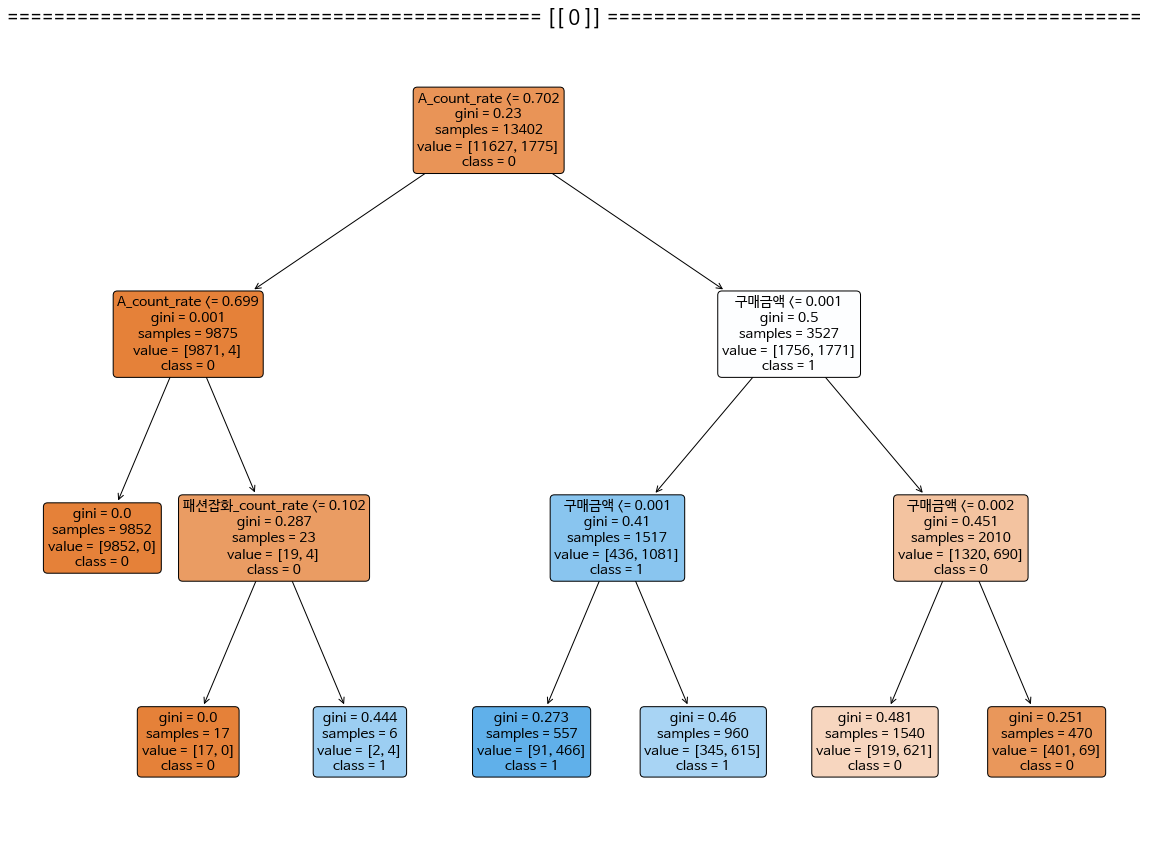

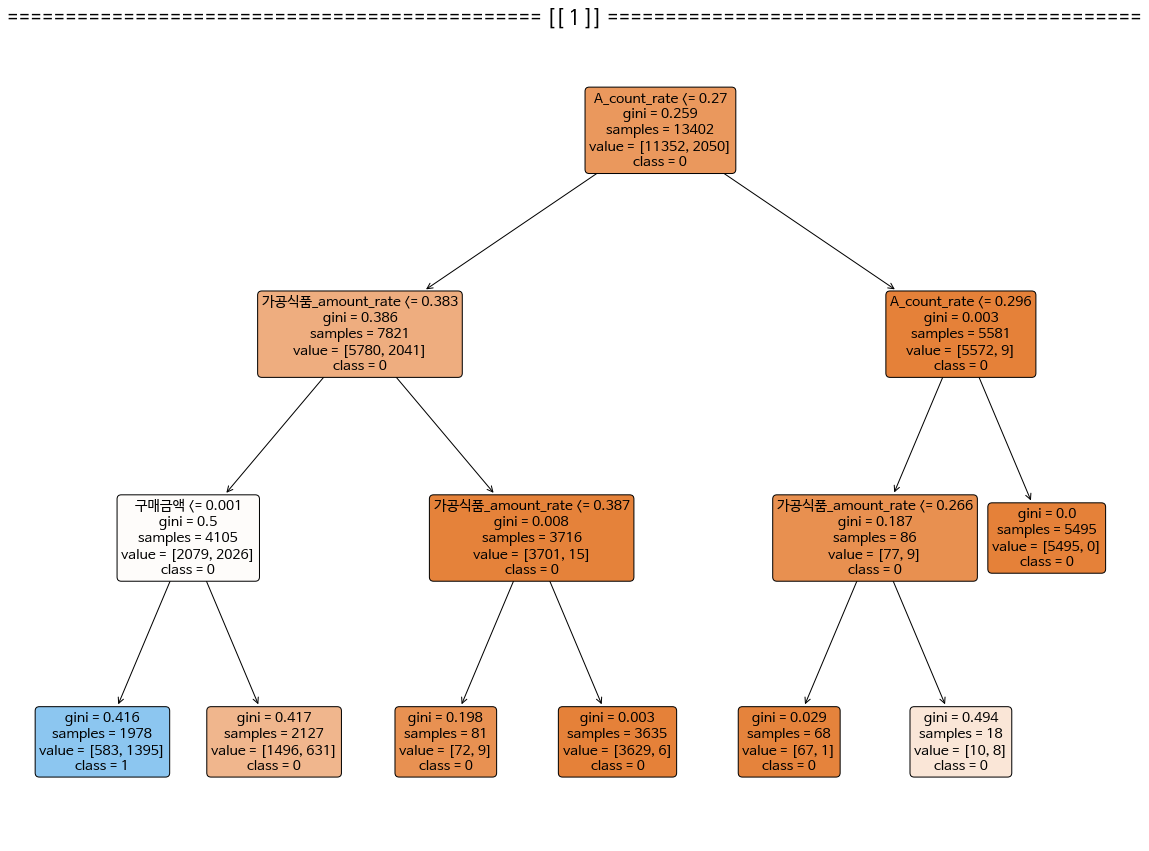

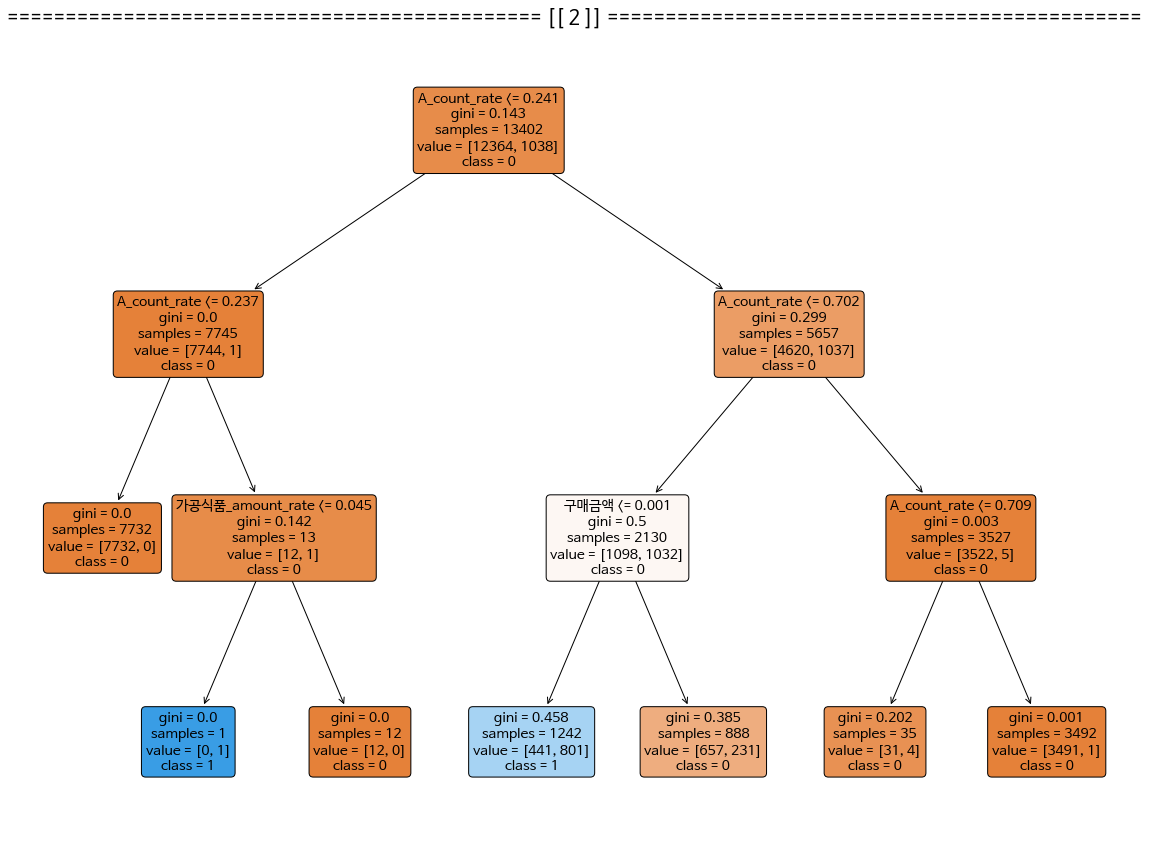

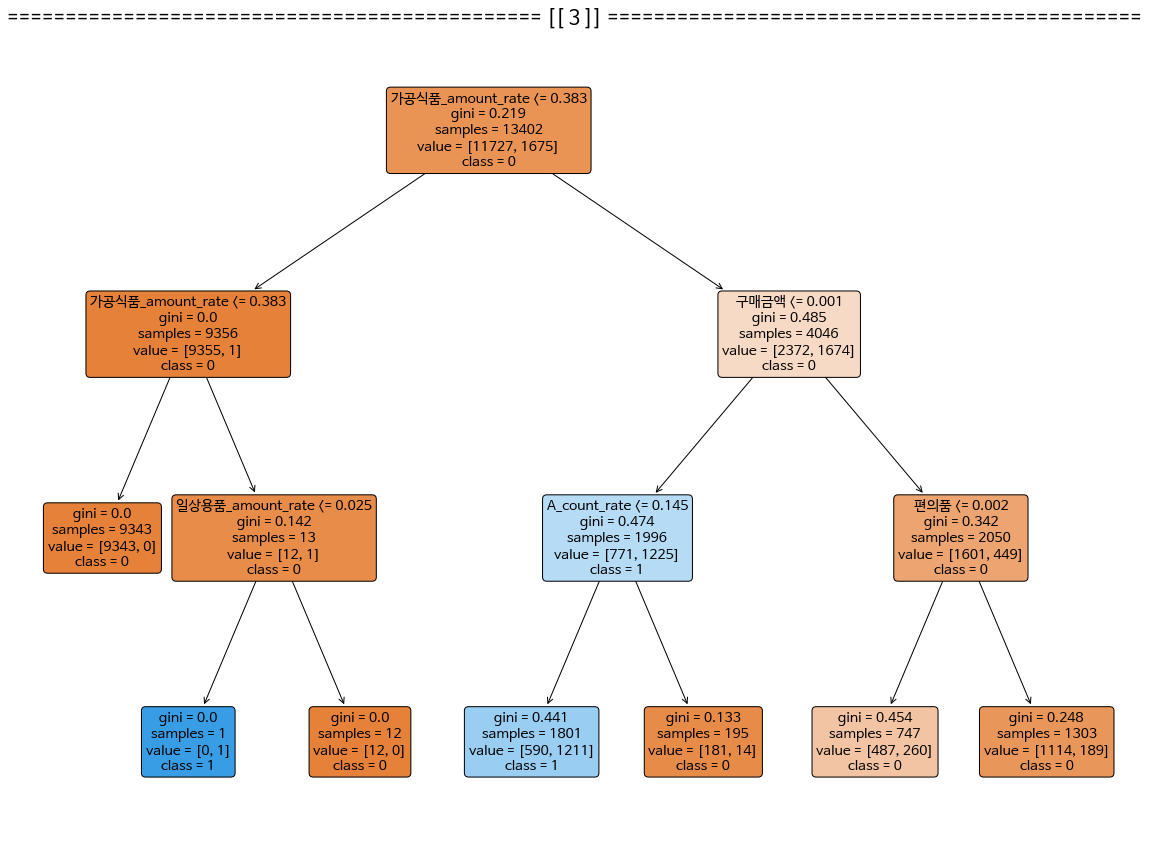

In [ ]:
# 군집별 데이터셋 생성(전체 데이터셋, 감소 + 유지/증가 고객)
# tree_cluster 컬럼 - 해당 군집은 1, 나머지는 0

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

cluster_dataset = dataset2.join(cls_dataset['cluster']).fillna(4)

def cluster_col(cluster, num):
    if cluster == num:
      return 1
    else:
      return 0

for num in range(4):
  globals()[f'cluster_{num}'] = cluster_dataset.copy()
  globals()[f'cluster_{num}']['tree_cluster'] = globals()[f'cluster_{num}'].apply(lambda x: cluster_col(x['cluster'],num), axis=1)
  globals()[f'cluster_{num}'].drop(['y','cluster'], axis=1, inplace=True)

  X_train, X_test, y_train, y_test = train_test_split(globals()[f'cluster_{num}'].drop(['tree_cluster'],axis=1),
                                                    globals()[f'cluster_{num}'].tree_cluster,
                                                    test_size = 0.3,
                                                    random_state=1004)

  dct_clf = DecisionTreeClassifier(max_depth=3)
  dct_clf.fit(X_train,y_train)


  plt.figure(figsize=(20,15))
  plot_tree(dct_clf, filled=True,
                feature_names=X_train.columns,
                class_names=['0','1','2','3'],
                rounded=True, fontsize=14)
  plt.title(f'============================================== [[ {num} ]] ==============================================', fontsize=20)
  # plt.show()
